# Machine learning heart disease predictor

This notebook looks into using various Python-based machine learning and data science libraries in an attemp to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

To fullfill this purpose we shall take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleveland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
      * 0: Typical angina: chest pain related decrease blood supply to the heart
      * 1: Atypical angina: chest pain not related to heart
      * 2: Non-anginal pain: typically esophageal spasms (non heart related)
      * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
      * serum = LDL + HDL + .2 * triglycerides
      * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
      * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
      * 0: Nothing to note
      * 1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
      * 2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
      * 0: Upsloping: better heart rate with excercise (uncommon)
      * 1: Flatsloping: minimal change (typical healthy heart)
      * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
      * colored vessel means the doctor can see the blood passing through
      * the more blood movement the better (no clots)
13. thal - thalium stress result
      * 1,3: normal
      * 6: fixed defect: used to be defect but ok now
      * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

#### Preparing the tools for the Exploratory Data Analysis (EDA) section

We will use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need for the EDA section
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
# To not show Panda's future warnings (makes the project cleaner)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Import Pandas
import pandas as pd
# Import Matplotlib
import matplotlib.pyplot as plt
# Allows us to visualize the charts within the notebook
%matplotlib inline

#### Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

In the EDA section we will try to obtain information from the data based on different data processing techniques, such as:

* Descriptive analysis of the data
* Missing values treatment
* Outliers treatment
* Parameter correlation

In [3]:
# Shows the first five rows of our DataFrame
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
# Shows the last five rows of our DataFrame
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [5]:
# Since we want to predict the column "target" with our model, it is a good a idea to work a little with it

# Shows how many elements the column "target" has
df["target"].count()

303

In [6]:
# Shows a summary of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Shows the total count of the elements in the parameter "target"
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

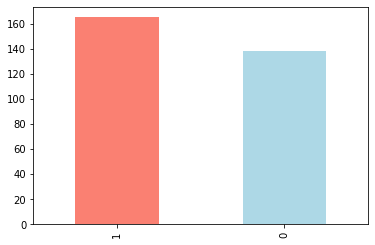

In [8]:
# Shows a bar chart with the above results
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [9]:
# Shows some statistical information about our data
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

**It is interesting to always do this to be able to see some statistically relevant information about the data we are working with.**

### Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

**According to the section: 4. Features, male=1 & female=0, so the amount of men patients more than doubles the female in our data**

In [11]:
# Compare "target" column with "sex" column
pd.crosstab(df.target, df.sex)

sex      0    1
target         
0       24  114
1       72   93

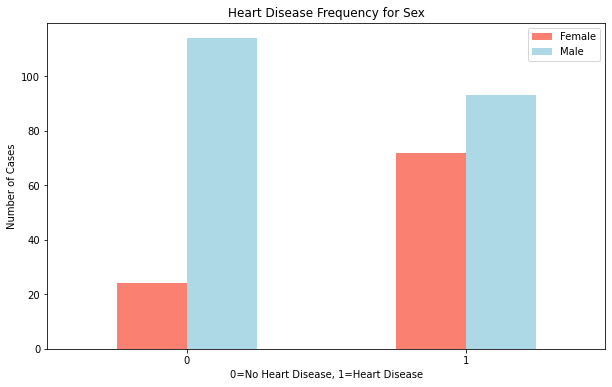

In [12]:
# Shows a bar chart with the above results
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No Heart Disease, 1=Heart Disease")
plt.ylabel("Number of Cases")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

#### Note that:

* Males have more presence in our DataFrame than females.

* Males have more cases that ended up not being heart disease and also have more cases that ended up being heart disease.

**Cholesterol levels and heart disease.**

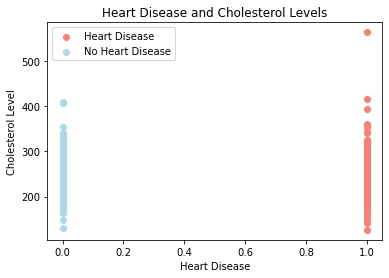

In [13]:
# Scatter with positive examples (Heart Disease)
plt.scatter(df.target[df.target==1],
            df.chol[df.target==1],
            color="salmon")

# Scatter with negative examples (No Heart Disease)
plt.scatter(df.target[df.target==0],
            df.chol[df.target==0],
            color="lightblue")

# Add some helpful info
plt.title("Heart Disease and Cholesterol Levels")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol Level")
plt.legend(["Heart Disease", "No Heart Disease"]);

> This chart (above) is not as descriptive as the rest of the charts in this project but is highly recomended to see it for it's importance. Based on it, it seems like the cholesterol is behaving in an irregural way in terms of explain the possibility of a heart disease, which is contrary to what might be expected. Further analysis and explanation will be given in the correlation section, but we considered important to note it.

#### Age and Heart Rate for Heart Disease

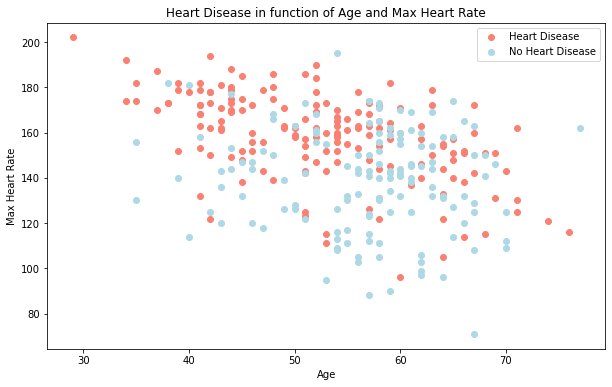

In [14]:
# Create a figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples (Heart Disease)
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon")

# Scatter with negative examples (No Heart Disease)
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "No Heart Disease"]);

#### Nothe that:

   * The majority of the positive cases of heart disease where the maximum heart rate can be a relevant explicative parameter are concentrated between 30 and 55 years old.
   * Related to the statement above, it seems that the heart rate is more indicative of a heart disease in people until age of 55 than the people beyond this age.
   * In general, people of 50 and beyond needs less maximum heart rate to have a heart condition than the other age ranges.

**Chest pain type and heart disease.**

In [15]:
# Compare the chest pain(cp) and the target (Heart or No Heart Disease)
pd.crosstab(df.cp, df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

#### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type:  
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

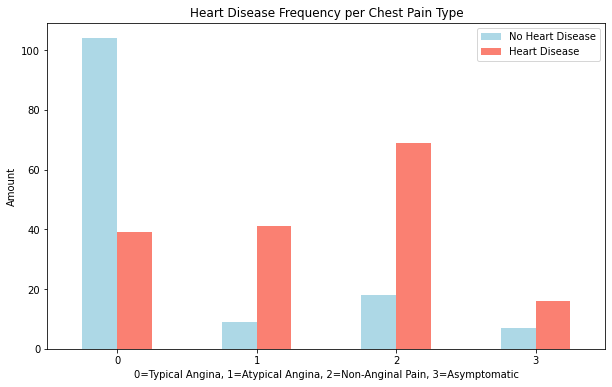

In [16]:
# Visualize the crosstab
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["lightblue", "salmon"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("0=Typical Angina, 1=Atypical Angina, 2=Non-Anginal Pain, 3=Asymptomatic")
plt.ylabel("Amount")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0);

#### Note that:

* The majority of the cases of a typical angina are not related with a heart disease.

* The vast majority of an atypical angina are not related with heart disease. Specifically, this cases only ended up in a heart disease 9 out of 41.

* The vast majority of a non-anginal pain are not related with heart disease. Specifically, this cases only ended up in a heart disease 18 out of 69.

* The majority of an asymptomatic cases are not related with a heart disease.

> To better understand this section we suggest to refer to the explanation of the different types of chest pain located above the chart in this same section.

#### Cholesterol and Resting Blood Preasure for Heart Disease

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
      * serum = LDL + HDL + .2 * triglycerides
      * above 200 is cause for concern

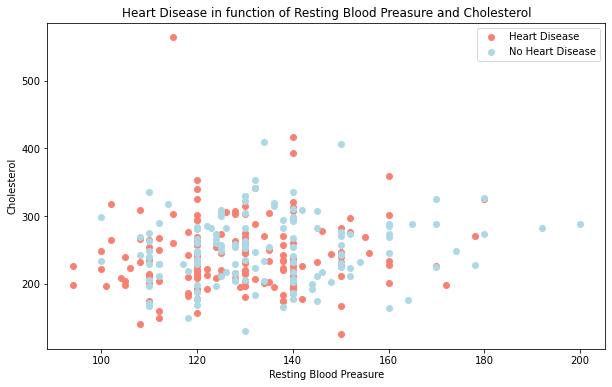

In [17]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples (Heart Disease)
plt.scatter(df.trestbps[df.target==1],
            df.chol[df.target==1],
            color="salmon")

# Scatter with negative examples (No Heart Disease)
plt.scatter(df.trestbps[df.target==0],
            df.chol[df.target==0],
            color="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Resting Blood Preasure and Cholesterol")
plt.xlabel("Resting Blood Preasure")
plt.ylabel("Cholesterol")
plt.legend(["Heart Disease", "No Heart Disease"]);

#### Note that:

* The majority of cases of heart disease are between the 100 and 140 levels of the resting blood pressure parameter.

* In general, levels of cholesterol above of 200 concentrate the vast majority of the cases.

> As before, we suggest to refer to the explanation of cholesterol and maximum heart rate located above the chart to better understand this section.

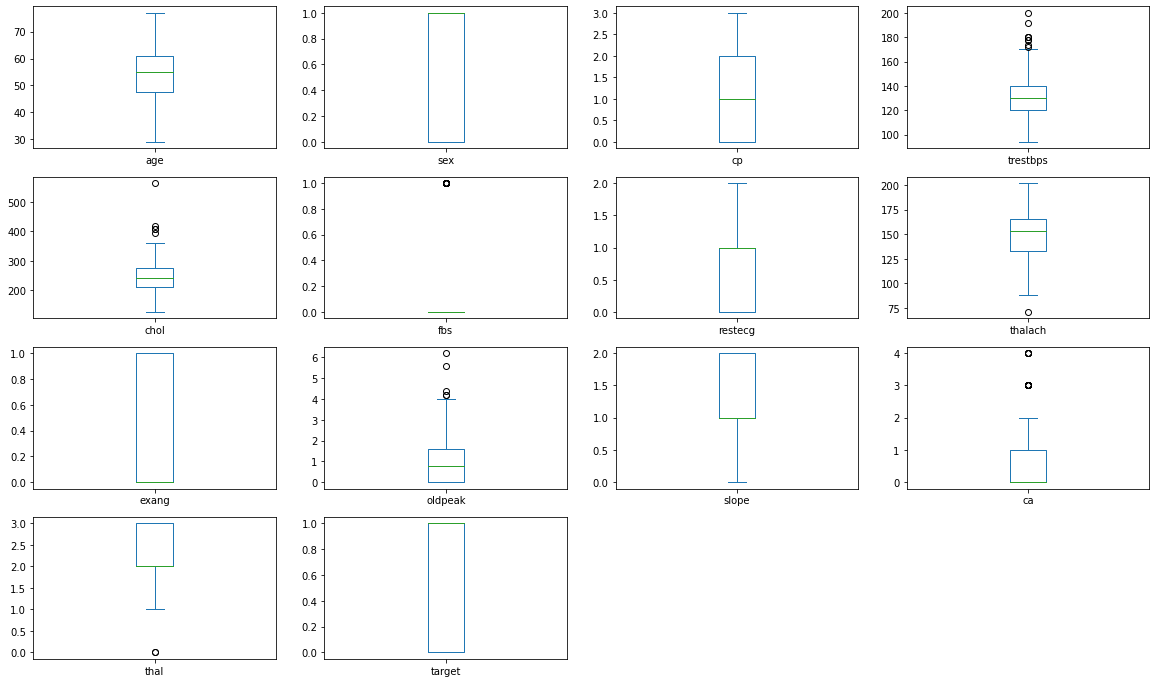

In [18]:
# Shows a box plot of each parameter in the data
df.plot(kind="box", subplots=True, figsize=(20,12), layout=(4,4), sharex=False, sharey=False)
plt.show()

#### Box plots can be useful to see if our data has outliers, in our case some parameters have them, such as:

* "trestbps"(resting blood pressure)
* "chol"(cholesterol)
* "fbs"(fasting blood sugar)
* "oldpeak"(ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more)
* "ca"(number of major vessels (0-3) colored by flourosopy)
* "thal"(thalium stress result)

**Parameter distributions.**

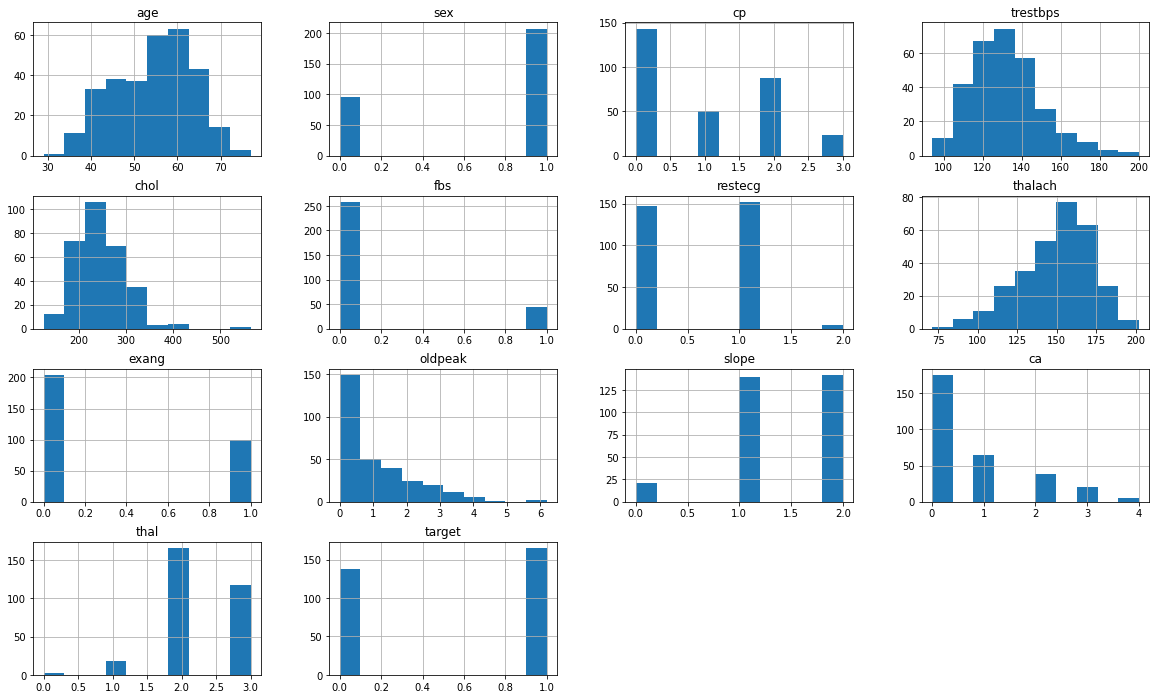

In [19]:
# Shows the distributions of each parameter in our data
df.hist(figsize=(20,12))
plt.show()

#### It is important to check out the distributions of our variables because it is a good way to see potential outliers. Some of our parameters ("age", "trestbps", "chol" and "thalach") seem to follow a gaussian distribution and the rest do not.

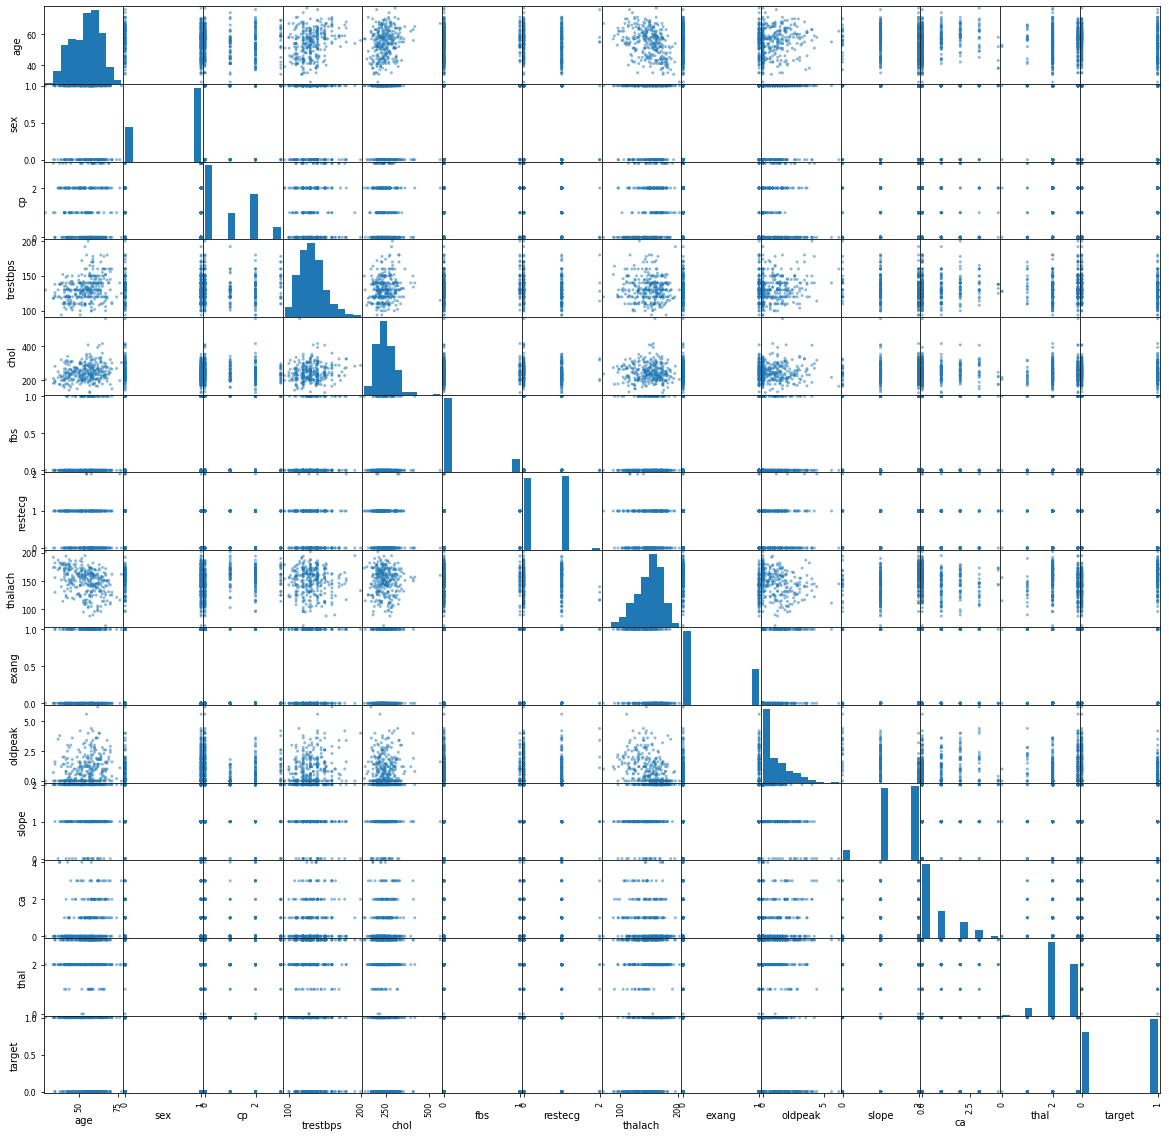

In [20]:
# Plot a scatter matrix
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show()

#### The scatter matrix allows us to display a matrix of scatter plots crossing the quantitative characteristics of our dataframe. It is a good way to see the relationships between the parameters in our data and try to anticipate some insights, like for example the correlation between the variables before doing a correlation anlysis.

### Missing values treatment

#### In order to be able to create a machine learning model is essential to check out that our data has no missing values.

In [21]:
# Check out for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Since the data do not contain missing values, no further work is required in this section.**

### Parameter Correlation

> Correlation measures the degree of interdependency between two variables. This interdependency can be either positive or negative, or neither.

* Positive correlation: the tendency of both variables is to move to the same direction i.e., if one variable increases, so does the other. It's maximum value is 1.

* Negative correlation: the tendency of both variables is to move to the opposite direction i.e., if one variable increases, the other decreases. It's maximum value is -1.

* No correlation: Both variables are not interdependent i.e., what happens to one do not affect the other. The value for no correlation is 0.

Therefore, the range of correlation varies between -1 and 1. The closer to -1 or 1 the correlation between two variables is, the more interdependent the variables are (either positively or negatively). If the correlation between two variables is 0 then there is not interdependency between the variables.

In [22]:
# Let's see some more about the relationship of our data with a Correlation Matrix
df.corr() # This will create a Correlation Matrix which it will compare each of the columns of our data frame to each other

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

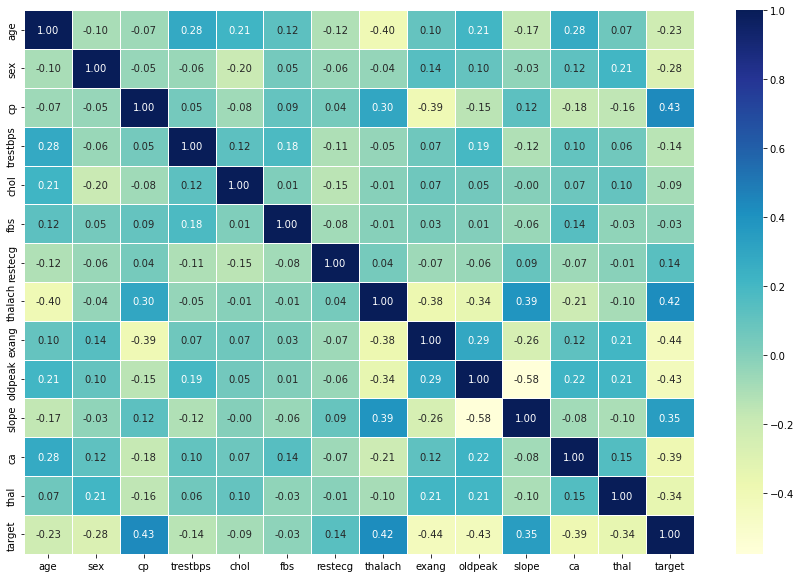

In [23]:
# Import seaborn
import seaborn as sns

# Show a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

**The correlation matrix shows the correlation between the features of our data.**

We can draw some conclusions from the matrix:

* The diagonal of ones shows the correlation of each feature with itself what by definition is 1.

* The features "cp", "thalach", and "slope" are the ones that are more positively correlated with the feature "target".

* The highest positively correlated feature is "cp" with a coefficient of determination of 0.43.

* The features "thal", "ca", "oldpeak", and "exang" are the ones that are more negatively correlated with the feature "target".

* The highest negatively correlated feature is "exang" with a coefficient of determination of -0.44.

* The feature less correlated with the feature "target" is "fbs" with a coefficient of determination of -0.03.

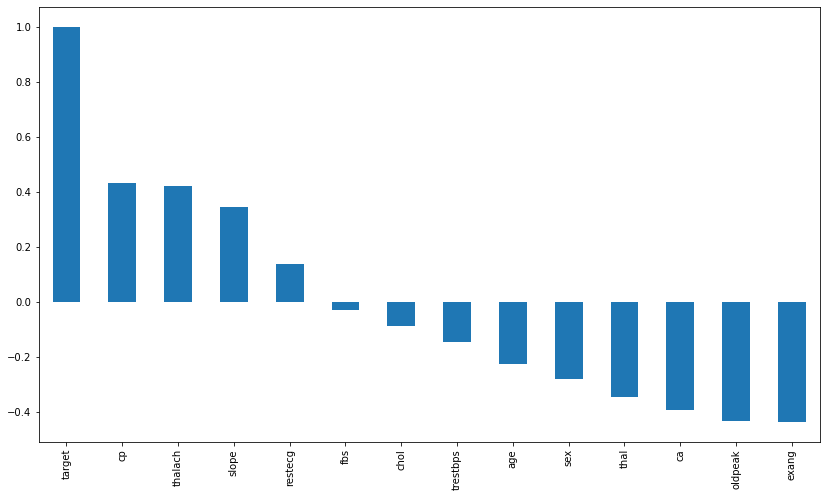

In [24]:
# Show a bar plot based on the correlation of each parameter with the parameter "target"
plt.figure(figsize=(14,8))
feature_target_correlation_bar_plot = df.corr()["target"].sort_values(ascending=False).plot(kind="bar")

#### In the above chart we can see the correlation between each feature of our data and the feature "target", the longest the bar (closer to -1 or 1) the more the correlation (either positive or negative), the shortest the bar (closer to 0) the less the correlation.

## 5. Modelling

#### Approach explanation:

We will try different classification machine learning models in our data. However, our approach may differ from others in the way we will treat our data. We can easily explain our approach with the following list:

1. Run the models without using Scikit-Learn preprocessing tools.
2. Run the models using data normalization.
3. Run the models using data standardization.
4. Run the models using robust scaling data transformation.
5. Evaluate the scores of each model and select the two with highest accuracy (in overall, not from each data treatment approach).

That said, shall we start?

> The models, the data preprocessing tools, and the data evaluation tools will be imported in order of use.

**Split the data into X & y**

In [25]:
# Split the data into X & y
X = df.drop("target", axis=1)
y = df["target"]

**Let's visualize `X` and `y` to confirm that the split has been made.**

In [26]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

**Split the data into train and test sets**

In [28]:
# Import the train test split tool
from sklearn.model_selection import train_test_split

# set the seed to make our results reproducible
np.random.seed(42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Normalization option

In [29]:
# Import the MinMaxScaler tool
from sklearn.preprocessing import MinMaxScaler

# Set the scaler
scaler = MinMaxScaler()

# Scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Standardization option

In [29]:
# Import the StandardScaler tool
from sklearn.preprocessing import StandardScaler

# Set the scaler
scaler = StandardScaler()

# Scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Robust scaling option

In [29]:
# Import the RobustScaler tool
from sklearn.preprocessing import RobustScaler

# Set the scaler
scaler = RobustScaler()

# Scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Ensemble Models

### Ensemble Models Evaluation

In [30]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_predict


# Create a dictionary for the models
ensemble_models = {"Ada Boost": AdaBoostClassifier(),
                   "Extra Trees": ExtraTreesClassifier(),
                   "Gradient Boosting": GradientBoostingClassifier(),
                   "Random Forest": RandomForestClassifier(),
                   "Histogram-based Gradient Boosting Tree": HistGradientBoostingClassifier()}

# Create a function to fit and score models
def fit_and_score_ensemble(ensemble_models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given the machine learning model.
    ensamble_models: a dictionary of different Scikit-Learn machine learning ensamble models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    ensemble_scores = {}
    # Loop through models
    for name, model in ensemble_models.items(): #name=key, value=model, .items()= accesing the models in the dictionary named "models"
        # Fit the data
        model.fit(X_train, y_train)
        # Evaluate the model and append it's score to model_scores
        ensemble_scores[name] = model.score(X_test, y_test) # with [name] we are creating a key for our model_scores dictionary
    return ensemble_scores

In [31]:
ensemble_scores = fit_and_score_ensemble(ensemble_models=ensemble_models,
                                         X_train=X_train,
                                         X_test=X_test,
                                         y_train=y_train,
                                         y_test=y_test)
ensemble_scores

{'Ada Boost': 0.8032786885245902,
 'Extra Trees': 0.8524590163934426,
 'Gradient Boosting': 0.7868852459016393,
 'Random Forest': 0.8360655737704918,
 'Histogram-based Gradient Boosting Tree': 0.819672131147541}

### Model Comparison

#### Ensemble models scores with no preprocessing data

In [32]:
# Set seaborn's "darkgrid" style
sns.set_style("darkgrid")

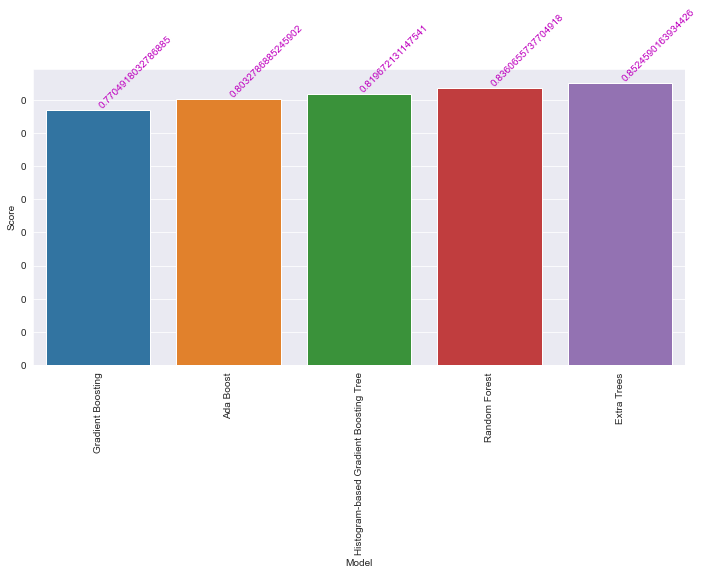

In [36]:
scores_dict = ({'Ada Boost': 0.8032786885245902,
                'Extra Trees': 0.8524590163934426,
                'Gradient Boosting': 0.7704918032786885, 
                'Random Forest': 0.8360655737704918, 
                'Histogram-based Gradient Boosting Tree': 0.819672131147541})
ensemble_comparison_df = pd.DataFrame(list(scores_dict.items()))
ensemble_comparison_df.columns=["Model", "Score"]

# Sort ensemble_comparison_df by column
ensemble_comparison_df = ensemble_comparison_df.sort_values(["Score"]).reset_index(drop=True)

# Make the graph
plt.figure(figsize=(10,8))
ax = sns.barplot(ensemble_comparison_df.index, ensemble_comparison_df.Score)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Model", ylabel="Score")
ax.set_xticklabels(ensemble_comparison_df.Model)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(ensemble_comparison_df["Score"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show();

#### Ensamble models scores with normalized data

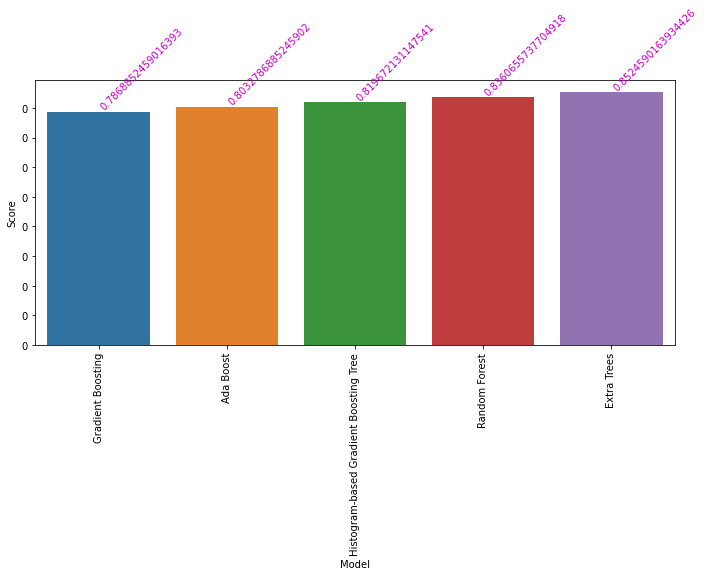

In [32]:
scores_dict = ({'Ada Boost': 0.8032786885245902,
                'Extra Trees': 0.8524590163934426,
                'Gradient Boosting': 0.7868852459016393, 
                'Random Forest': 0.8360655737704918, 
                'Histogram-based Gradient Boosting Tree': 0.819672131147541})
ensemble_comparison_df = pd.DataFrame(list(scores_dict.items()))
ensemble_comparison_df.columns=["Model", "Score"]

# Sort ensemble_comparison_df by column
ensemble_comparison_df = ensemble_comparison_df.sort_values(["Score"]).reset_index(drop=True)

# Make the graph
plt.figure(figsize=(10,8))
ax = sns.barplot(ensemble_comparison_df.index, ensemble_comparison_df.Score)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Model", ylabel="Score")
ax.set_xticklabels(ensemble_comparison_df.Model)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(ensemble_comparison_df["Score"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show();

#### Note: there is a little imporvement with normalized data in the Gradient Boosting model. The rest remains equal.

#### Ensamble models scores with standardized data

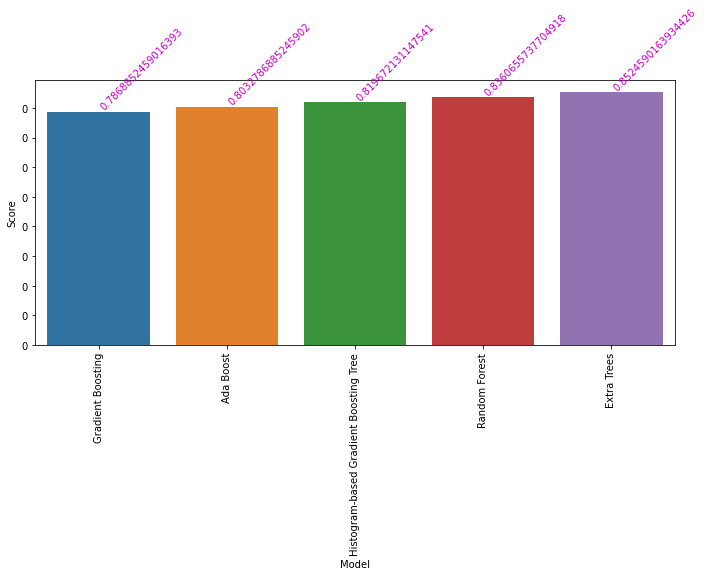

In [32]:
scores_dict = ({'Ada Boost': 0.8032786885245902,
                'Extra Trees': 0.8524590163934426,
                'Gradient Boosting': 0.7868852459016393, 
                'Random Forest': 0.8360655737704918, 
                'Histogram-based Gradient Boosting Tree': 0.819672131147541})
ensemble_comparison_df = pd.DataFrame(list(scores_dict.items()))
ensemble_comparison_df.columns=["Model", "Score"]

# Sort ensemble_comparison_df by column
ensemble_comparison_df = ensemble_comparison_df.sort_values(["Score"]).reset_index(drop=True)

# Make the graph
plt.figure(figsize=(10,8))
ax = sns.barplot(ensemble_comparison_df.index, ensemble_comparison_df.Score)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Model", ylabel="Score")
ax.set_xticklabels(ensemble_comparison_df.Model)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(ensemble_comparison_df["Score"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show();

#### Note: with standardized data we obtain the same results as that we got with normalized data.

#### Ensamble models scores with robust scaling transformation data

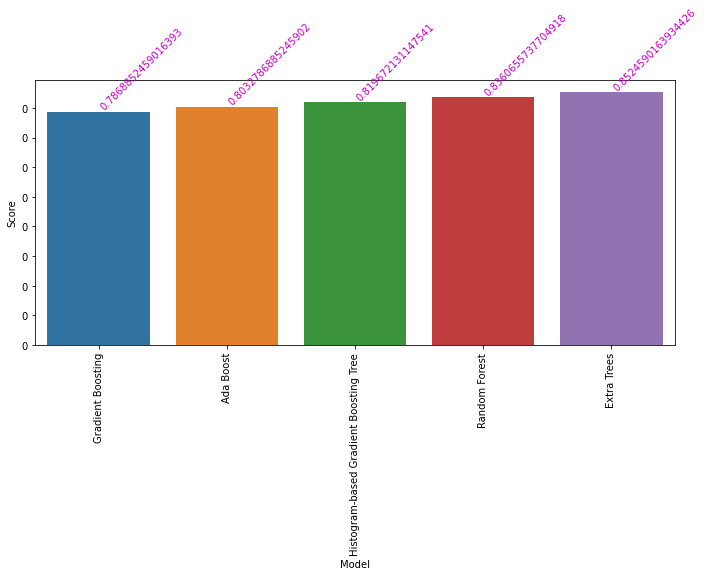

In [32]:
scores_dict = ({'Ada Boost': 0.8032786885245902,
                'Extra Trees': 0.8524590163934426,
                'Gradient Boosting': 0.7868852459016393, 
                'Random Forest': 0.8360655737704918, 
                'Histogram-based Gradient Boosting Tree': 0.819672131147541})
ensemble_comparison_df = pd.DataFrame(list(scores_dict.items()))
ensemble_comparison_df.columns=["Model", "Score"]

# Sort ensemble_comparison_df by column
ensemble_comparison_df = ensemble_comparison_df.sort_values(["Score"]).reset_index(drop=True)

# Make the graph
plt.figure(figsize=(10,8))
ax = sns.barplot(ensemble_comparison_df.index, ensemble_comparison_df.Score)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Model", ylabel="Score")
ax.set_xticklabels(ensemble_comparison_df.Model)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(ensemble_comparison_df["Score"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show();

#### Note: we obtain the same result as that we got with normalized and standardized data.

#### Ensemble Methods Summary:

* The worst method seems to be the one with no data preprocessing.

* The normalization, standardization and robust scaling options get the same results.

### Support Vector Machines

### Support Vector Machines Evaluation

In [30]:
from sklearn.svm import SVC, NuSVC, LinearSVC

# Create a dictionary for the models
support_vector_models = {"C-Support Vector Classification": SVC(),
                         "Nu-Support Vector Classification": NuSVC(),
                         "Linear Support Vector Classification": LinearSVC()}

# Create a function to fit and score models
def fit_and_score_support_vector(support_vector_models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given the machine learning model.
    support_vector_models: a dictionary of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    support_vector_scores = {}
    # Loop through models
    for name, model in support_vector_models.items(): #name=key, value=model, .items()= accesing the models in the dictionary named "models"
        # Fit the data
        model.fit(X_train, y_train)
        # Evaluate the model and append it's score to model_scores
        support_vector_scores[name] = model.score(X_test, y_test) # with [name] we are creating a key for our model_scores dictionary
    return support_vector_scores

In [31]:
support_vector_scores = fit_and_score_support_vector(support_vector_models=support_vector_models, 
                                                     X_train=X_train, 
                                                     X_test=X_test, 
                                                     y_train=y_train, 
                                                     y_test=y_test)
support_vector_scores

{'C-Support Vector Classification': 0.8688524590163934,
 'Nu-Support Vector Classification': 0.8688524590163934,
 'Linear Support Vector Classification': 0.8688524590163934}

### Model Comparison

#### Support Vector Machines with no preprocessing data

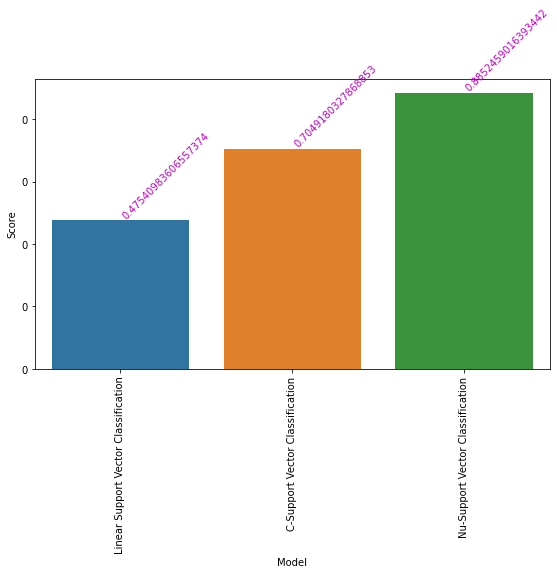

In [31]:
svm_scores_dict = ({'C-Support Vector Classification': 0.7049180327868853, 
                    'Nu-Support Vector Classification': 0.8852459016393442, 
                    'Linear Support Vector Classification': 0.47540983606557374})

svm_comparison_df = pd.DataFrame(list(svm_scores_dict.items()))
svm_comparison_df.columns=["Model", "Score"]

# Sort ensemble_comparison_df by column
svm_comparison_df = svm_comparison_df.sort_values(["Score"]).reset_index(drop=True)

# Make the graph
plt.figure(figsize=(8,8))
ax = sns.barplot(svm_comparison_df.index, svm_comparison_df.Score)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Model", ylabel="Score")
ax.set_xticklabels(svm_comparison_df.Model)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(svm_comparison_df["Score"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show();

#### Support Vector Machines with normalized data

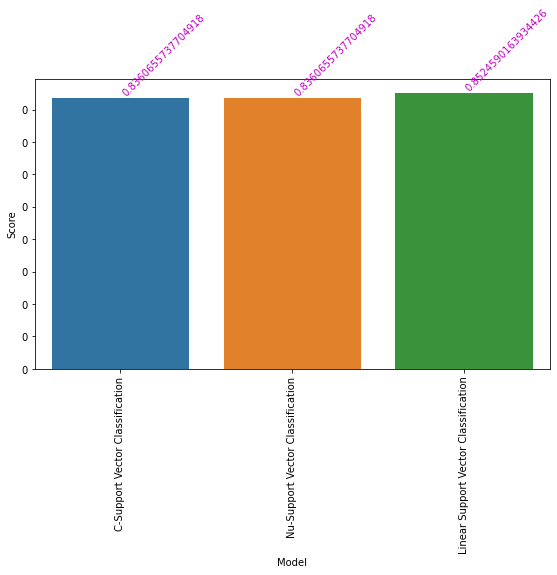

In [32]:
svm_scores_dict = ({'C-Support Vector Classification': 0.8360655737704918,
                'Nu-Support Vector Classification': 0.8360655737704918,
                'Linear Support Vector Classification': 0.8524590163934426})

svm_comparison_df = pd.DataFrame(list(svm_scores_dict.items()))
svm_comparison_df.columns=["Model", "Score"]

# Sort ensemble_comparison_df by column
svm_comparison_df = svm_comparison_df.sort_values(["Score"]).reset_index(drop=True)

# Make the graph
plt.figure(figsize=(8,8))
ax = sns.barplot(svm_comparison_df.index, svm_comparison_df.Score)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Model", ylabel="Score")
ax.set_xticklabels(svm_comparison_df.Model)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(svm_comparison_df["Score"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show();

#### Support Vector Machines with standardized data

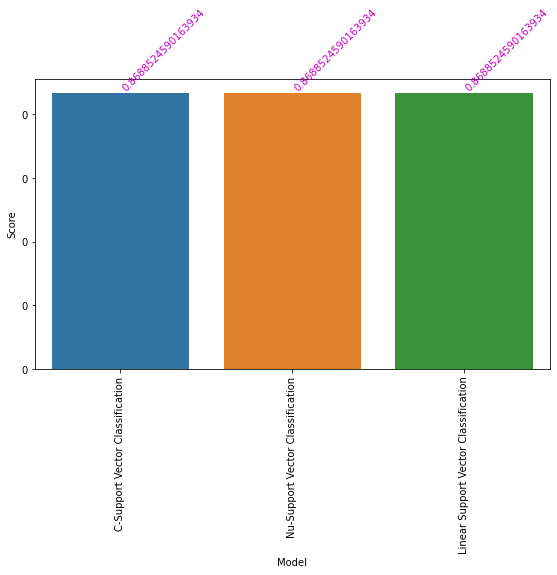

In [32]:
svm_scores_dict = ({'C-Support Vector Classification': 0.8688524590163934, 
                    'Nu-Support Vector Classification': 0.8688524590163934, 
                    'Linear Support Vector Classification': 0.8688524590163934})

svm_comparison_df = pd.DataFrame(list(svm_scores_dict.items()))
svm_comparison_df.columns=["Model", "Score"]

# Sort ensemble_comparison_df by column
svm_comparison_df = svm_comparison_df.sort_values(["Score"]).reset_index(drop=True)

# Make the graph
plt.figure(figsize=(8,8))
ax = sns.barplot(svm_comparison_df.index, svm_comparison_df.Score)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Model", ylabel="Score")
ax.set_xticklabels(svm_comparison_df.Model)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(svm_comparison_df["Score"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show();

#### Support Vector Machines with robust scaling data

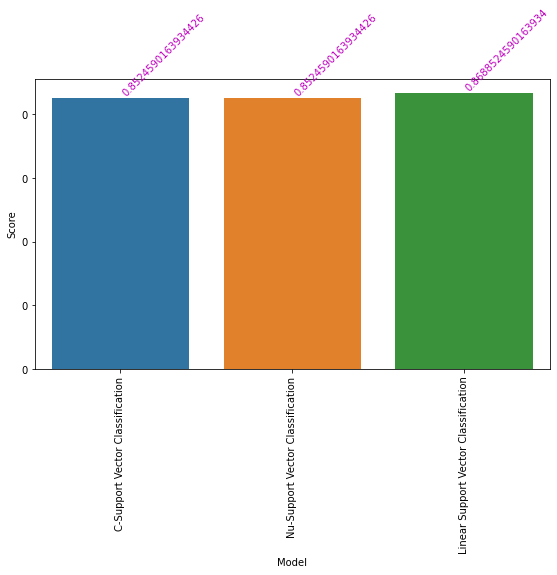

In [35]:
svm_scores_dict = ({'C-Support Vector Classification': 0.8524590163934426, 
                    'Nu-Support Vector Classification': 0.8524590163934426, 
                    'Linear Support Vector Classification': 0.8688524590163934})

svm_comparison_df = pd.DataFrame(list(svm_scores_dict.items()))
svm_comparison_df.columns=["Model", "Score"]

# Sort ensemble_comparison_df by column
svm_comparison_df = svm_comparison_df.sort_values(["Score"]).reset_index(drop=True)

# Make the graph
plt.figure(figsize=(8,8))
ax = sns.barplot(svm_comparison_df.index, svm_comparison_df.Score)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Model", ylabel="Score")
ax.set_xticklabels(svm_comparison_df.Model)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(svm_comparison_df["Score"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show();

#### Support Vector Machines Summary:

* The model that got the highest accuracy score of all methods was the Nu-Support Vector Classification with the no preprocessing data method...

* ... however, this method got huge variations in the scores if we compare all the models.

* Linear Support Vector Classification got the best scores with the rest of the methods.

### Other Models

> Since this group of models are from different families we will treat them separately.

#### Other Models with no preprocessing data

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.6885245901639344

In [60]:
from sklearn.linear_model import Perceptron

perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
perceptron_model.score(X_test, y_test)

0.4918032786885246

In [59]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_classifier_model = PassiveAggressiveClassifier()
pa_classifier_model.fit(X_train, y_train)
pa_classifier_model.score(X_test, y_test)

0.6885245901639344

In [58]:
from sklearn.linear_model import RidgeClassifier

ridge_clas_model = RidgeClassifier()
ridge_clas_model.fit(X_train, y_train)
ridge_clas_model.score(X_test, y_test)

0.8688524590163934

In [42]:
from sklearn.linear_model import SGDClassifier

sgd_clas_model = SGDClassifier()

sgd_clas_model.fit(X_train, y_train)
sgd_clas_model.score(X_test, y_test)

0.7868852459016393

In [57]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=800) # max_iter increased (default=100) to avoid the ConvergenceWarning: lbfgs failed to converge (status=1):STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

log_reg_model.fit(X_train, y_train)
log_reg_model.score(X_test, y_test)

0.8688524590163934

In [44]:
from sklearn.naive_bayes import GaussianNB

gau_model = GaussianNB()

gau_model.fit(X_train, y_train)
gau_model.score(X_test, y_test)

0.8688524590163934

#### No preprocessing scores

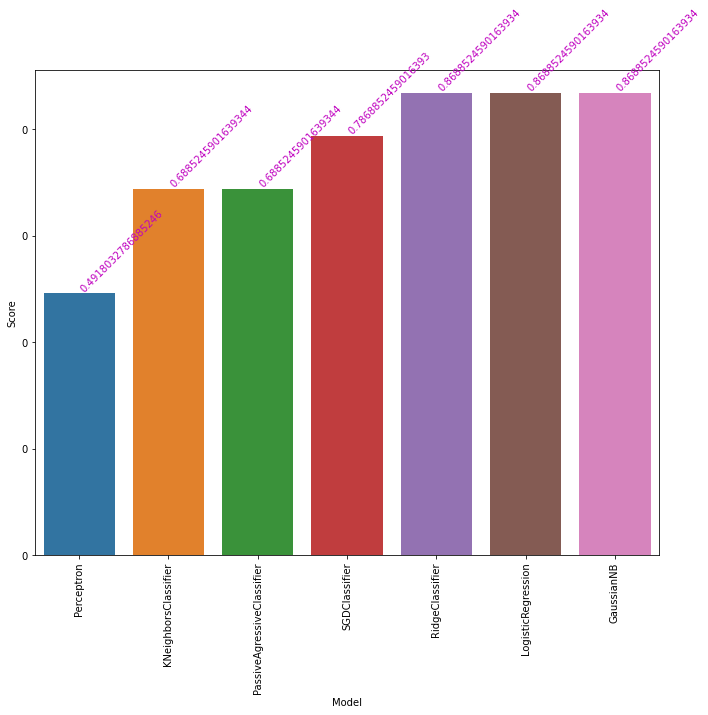

In [51]:
other_models_no_preprocessing_scores_dict = ({"KNeighborsClassifier": 0.6885245901639344, 
                                              "Perceptron": 0.4918032786885246, 
                                              "PassiveAgressiveClassifier": 0.6885245901639344, 
                                              "RidgeClassifier": 0.8688524590163934, 
                                              "SGDClassifier": 0.7868852459016393, 
                                              "LogisticRegression": 0.8688524590163934, 
                                              "GaussianNB": 0.8688524590163934})

other_models_comparison_df = pd.DataFrame(list(other_models_no_preprocessing_scores_dict.items()))
other_models_comparison_df.columns=["Model", "Score"]

# Sort ensemble_comparison_df by column
other_models_comparison_df = other_models_comparison_df.sort_values(["Score"]).reset_index(drop=True)

# Make the chart
plt.figure(figsize=(10,10))
ax = sns.barplot(other_models_comparison_df.index, other_models_comparison_df.Score)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Model", ylabel="Score")
ax.set_xticklabels(other_models_comparison_df.Model)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(other_models_comparison_df["Score"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show();

#### Other models with normalized data

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.8360655737704918

In [65]:
from sklearn.linear_model import Perceptron

perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
perceptron_model.score(X_test, y_test)

0.7704918032786885

In [66]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_classifier_model = PassiveAggressiveClassifier()
pa_classifier_model.fit(X_train, y_train)
pa_classifier_model.score(X_test, y_test)

0.8852459016393442

In [67]:
from sklearn.linear_model import RidgeClassifier

ridge_clas_model = RidgeClassifier()
ridge_clas_model.fit(X_train, y_train)
ridge_clas_model.score(X_test, y_test)

0.8852459016393442

In [71]:
from sklearn.linear_model import SGDClassifier

sgd_clas_model = SGDClassifier()

sgd_clas_model.fit(X_train, y_train)
sgd_clas_model.score(X_test, y_test)

0.5737704918032787

In [69]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=800) # max_iter increased (default=100) to avoid the ConvergenceWarning: lbfgs failed to converge (status=1):STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

log_reg_model.fit(X_train, y_train)
log_reg_model.score(X_test, y_test)

0.8524590163934426

In [70]:
from sklearn.naive_bayes import GaussianNB

gau_model = GaussianNB()

gau_model.fit(X_train, y_train)
gau_model.score(X_test, y_test)

0.8688524590163934

#### Normalization scores

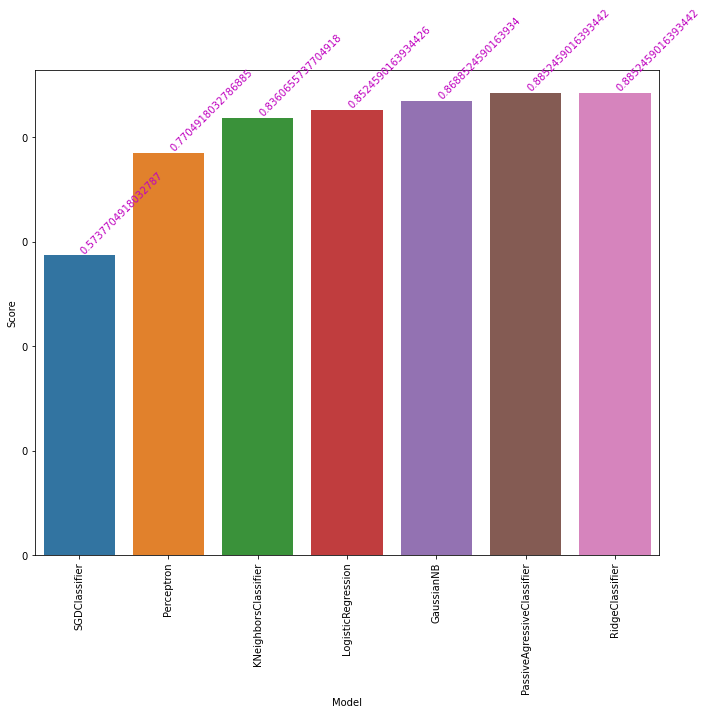

In [48]:
other_models_normalization_scores_dict = ({"KNeighborsClassifier": 0.8360655737704918, 
                                           "Perceptron": 0.7704918032786885, 
                                           "PassiveAgressiveClassifier": 0.8852459016393442, 
                                           "RidgeClassifier": 0.8852459016393442, 
                                           "SGDClassifier": 0.5737704918032787, 
                                           "LogisticRegression": 0.8524590163934426, 
                                           "GaussianNB": 0.8688524590163934})

other_models_comparison_df = pd.DataFrame(list(other_models_normalization_scores_dict.items()))
other_models_comparison_df.columns=["Model", "Score"]

# Sort ensemble_comparison_df by column
other_models_comparison_df = other_models_comparison_df.sort_values(["Score"]).reset_index(drop=True)

# Make the chart
plt.figure(figsize=(10,10))
ax = sns.barplot(other_models_comparison_df.index, other_models_comparison_df.Score)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Model", ylabel="Score")
ax.set_xticklabels(other_models_comparison_df.Model)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(other_models_comparison_df["Score"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show();

#### Other models with standardized data

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.9016393442622951

In [32]:
from sklearn.linear_model import Perceptron

perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
perceptron_model.score(X_test, y_test)

0.8524590163934426

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_classifier_model = PassiveAggressiveClassifier()
pa_classifier_model.fit(X_train, y_train)
pa_classifier_model.score(X_test, y_test)

0.7704918032786885

In [34]:
from sklearn.linear_model import RidgeClassifier

ridge_clas_model = RidgeClassifier()
ridge_clas_model.fit(X_train, y_train)
ridge_clas_model.score(X_test, y_test)

0.8688524590163934

In [36]:
from sklearn.linear_model import SGDClassifier

sgd_clas_model = SGDClassifier()

sgd_clas_model.fit(X_train, y_train)
sgd_clas_model.score(X_test, y_test)

0.7540983606557377

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=800) # max_iter increased (default=100) to avoid the ConvergenceWarning: lbfgs failed to converge (status=1):STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

log_reg_model.fit(X_train, y_train)
log_reg_model.score(X_test, y_test)

0.8524590163934426

In [38]:
from sklearn.naive_bayes import GaussianNB

gau_model = GaussianNB()

gau_model.fit(X_train, y_train)
gau_model.score(X_test, y_test)

0.8688524590163934

#### Standardization scores

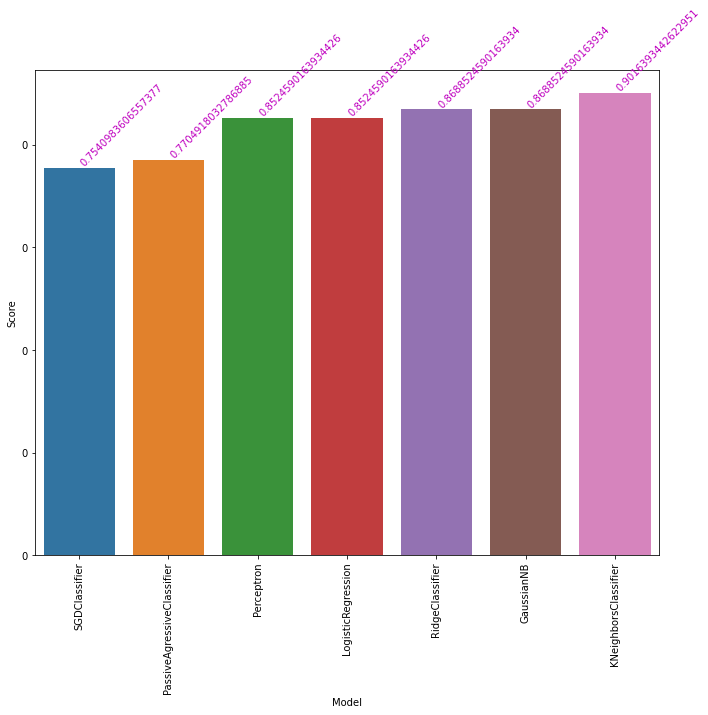

In [49]:
other_models_standardization_scores_dict = ({"KNeighborsClassifier": 0.9016393442622951, 
                                             "Perceptron": 0.8524590163934426, 
                                             "PassiveAgressiveClassifier": 0.7704918032786885, 
                                             "RidgeClassifier": 0.8688524590163934, 
                                             "SGDClassifier": 0.7540983606557377, 
                                             "LogisticRegression": 0.8524590163934426, 
                                             "GaussianNB": 0.8688524590163934})

other_models_comparison_df = pd.DataFrame(list(other_models_standardization_scores_dict.items()))
other_models_comparison_df.columns=["Model", "Score"]

# Sort ensemble_comparison_df by column
other_models_comparison_df = other_models_comparison_df.sort_values(["Score"]).reset_index(drop=True)

# Make the chart
plt.figure(figsize=(10,10))
ax = sns.barplot(other_models_comparison_df.index, other_models_comparison_df.Score)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Model", ylabel="Score")
ax.set_xticklabels(other_models_comparison_df.Model)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(other_models_comparison_df["Score"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show();

#### Other models with robust scaling data

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.8524590163934426

In [31]:
from sklearn.linear_model import Perceptron

perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
perceptron_model.score(X_test, y_test)

0.8524590163934426

In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_classifier_model = PassiveAggressiveClassifier()
pa_classifier_model.fit(X_train, y_train)
pa_classifier_model.score(X_test, y_test)

0.8032786885245902

In [33]:
from sklearn.linear_model import RidgeClassifier

ridge_clas_model = RidgeClassifier()
ridge_clas_model.fit(X_train, y_train)
ridge_clas_model.score(X_test, y_test)

0.8688524590163934

In [34]:
from sklearn.linear_model import SGDClassifier

sgd_clas_model = SGDClassifier()

sgd_clas_model.fit(X_train, y_train)
sgd_clas_model.score(X_test, y_test)

0.8360655737704918

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=800) # max_iter increased (default=100) to avoid the ConvergenceWarning: lbfgs failed to converge (status=1):STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

log_reg_model.fit(X_train, y_train)
log_reg_model.score(X_test, y_test)

0.8524590163934426

In [37]:
from sklearn.naive_bayes import GaussianNB

gau_model = GaussianNB()

gau_model.fit(X_train, y_train)
gau_model.score(X_test, y_test)

0.8688524590163934

#### Robust scaling scores

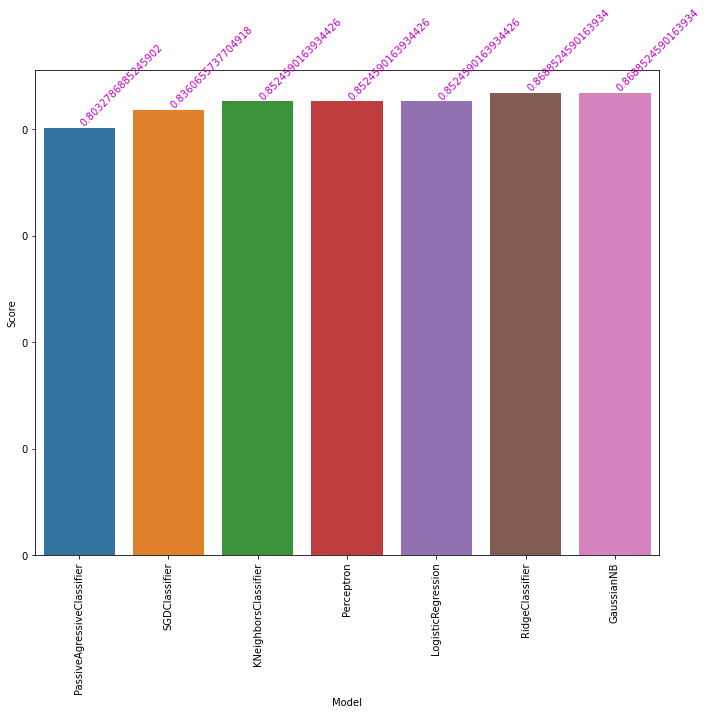

In [50]:
other_models_robust_scores_dict = ({"KNeighborsClassifier": 0.8524590163934426, 
                                     "Perceptron": 0.8524590163934426, 
                                     "PassiveAgressiveClassifier": 0.8032786885245902, 
                                     "RidgeClassifier": 0.8688524590163934,
                                     "SGDClassifier": 0.8360655737704918,
                                     "LogisticRegression": 0.8524590163934426, 
                                     "GaussianNB": 0.8688524590163934})

other_models_comparison_df = pd.DataFrame(list(other_models_robust_scores_dict.items()))
other_models_comparison_df.columns=["Model", "Score"]

# Sort ensemble_comparison_df by column
other_models_comparison_df = other_models_comparison_df.sort_values(["Score"]).reset_index(drop=True)

# Make the chart
plt.figure(figsize=(10,10))
ax = sns.barplot(other_models_comparison_df.index, other_models_comparison_df.Score)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Model", ylabel="Score")
ax.set_xticklabels(other_models_comparison_df.Model)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(other_models_comparison_df["Score"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show();

#### Other models summary:

* The best overall model is the KNeighborsClassifier with stardardized data (90.16% accuracy).

* The second best overall models are PassiveAgressiveClassifier and RidgeClassifier with normalized data (both tied with 88.52% accuracy).

* Robust scaling data is the most consistent method in terms of the average of the scores (84.75% accuracy).

* No preprocessing data is the less consistent method in terms of the average of the scores (75,17% accuracy).

## 6. Experimentation

In this section we will focus on trying to improve our three best models from the section before. We will also select more scoring methods to get a more comprehensive vision of our models performance.

**Tools and techniques to improve our models:**
* Hyperparameter tuning:
    * GridSearchCV
    * Optuna

**Classification Scoring methods (beyond accuracy):**
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

> **Quick reminder**: our best models from the section 5 (Modelling) were: KNeighborsClassifier with standardized data (90.16% accuracy), and PassiveAgressiveClassifier and RidgeClassifier, with normalized data (both with 88.52% accuracy).

#### Hyperparameter tuning using Optuna

In [30]:
import optuna
from optuna.samplers import TPESampler

#### KNeighborsClassifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    
    n_neighbors = trial.suggest_int("n_neighbors", 5, 50)
    metric = trial.suggest_categorical("metric", ["minkowski", "manhattan", "cityblock", "l1", "l2"])
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    
    np.random.seed(42)
    
    model = KNeighborsClassifier(n_jobs=-1, 
                                 n_neighbors=n_neighbors, 
                                 metric=metric, 
                                 weights=weights)
                          
    score = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=5).mean()
    
    return score

study_knn = optuna.create_study(study_name="knn_case",
                                direction="maximize",
                                sampler=TPESampler())

study_knn.optimize(objective, n_trials=500)

[I 2023-02-20 19:01:47,784] A new study created in memory with name: knn_case
[I 2023-02-20 19:01:47,855] Trial 0 finished with value: 0.8223639455782313 and parameters: {'n_neighbors': 16, 'metric': 'cityblock', 'weights': 'distance'}. Best is trial 0 with value: 0.8223639455782313.
[I 2023-02-20 19:01:47,926] Trial 1 finished with value: 0.822278911564626 and parameters: {'n_neighbors': 9, 'metric': 'manhattan', 'weights': 'distance'}. Best is trial 0 with value: 0.8223639455782313.
[I 2023-02-20 19:01:47,980] Trial 2 finished with value: 0.8058673469387754 and parameters: {'n_neighbors': 45, 'metric': 'l2', 'weights': 'distance'}. Best is trial 0 with value: 0.8223639455782313.
[I 2023-02-20 19:01:48,047] Trial 3 finished with value: 0.8183673469387756 and parameters: {'n_neighbors': 24, 'metric': 'l2', 'weights': 'uniform'}. Best is trial 0 with value: 0.8223639455782313.
[I 2023-02-20 19:01:48,127] Trial 4 finished with value: 0.8221938775510204 and parameters: {'n_neighbors': 8, 

In [62]:
study_knn.best_params

{'n_neighbors': 20, 'metric': 'manhattan', 'weights': 'uniform'}

In [63]:
from sklearn.neighbors import KNeighborsClassifier

optuna_optimized_knn = KNeighborsClassifier(n_neighbors=20, metric="manhattan", weights="uniform")

optuna_optimized_knn.fit(X_train, y_train)
optuna_optimized_knn.score(X_test, y_test)

0.8852459016393442

In [64]:
knn_optimization = optuna.visualization.plot_optimization_history(study_knn)
knn_optimization.show()

In [65]:
knn_param_importance = optuna.visualization.plot_param_importances(study_knn)
knn_param_importance.show()

#### KNeighborsClassifier improvement using Optuna summary:

* After dozens of different hyperparameter combinations using Optuna we have not been able to improve the base model score.

* Best scores:
    
    * Base model = 90.16% accuracy
    
    * Optuna = 88.52% accuracy

#### PassiveAgressiveClassifier

In [45]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import cross_val_score

def objective_2(trial):
    
    C = trial.suggest_float("C", 0.0001, 1.0)
    max_iter = trial.suggest_int("max_iter", 1000, 10000)
    tol = trial.suggest_float("tol", 0.00001, 0.1)
    
    np.random.seed(42)
    
    model_2 = PassiveAggressiveClassifier(n_jobs=-1,
                                        C=C, 
                                        max_iter=max_iter,
                                        tol=tol)
    
    score = cross_val_score(model_2, X_train, y_train, scoring="accuracy", cv=5).mean()
    
    return score

study_pac = optuna.create_study(study_name="pac_case",
                                direction="maximize",
                                sampler=TPESampler())

study_pac.optimize(objective_2, n_trials=10000)

[I 2023-02-20 20:01:24,949] A new study created in memory with name: pac_case
[I 2023-02-20 20:01:24,959] Trial 0 finished with value: 0.7107993197278912 and parameters: {'C': 0.9587589757294819, 'max_iter': 8302, 'tol': 0.024467837172213965}. Best is trial 0 with value: 0.7107993197278912.
[I 2023-02-20 20:01:24,967] Trial 1 finished with value: 0.7230442176870748 and parameters: {'C': 0.9915539036725814, 'max_iter': 3417, 'tol': 0.028736190475676732}. Best is trial 1 with value: 0.7230442176870748.
[I 2023-02-20 20:01:24,975] Trial 2 finished with value: 0.7317176870748299 and parameters: {'C': 0.25378948550723396, 'max_iter': 5954, 'tol': 0.04343544936417721}. Best is trial 2 with value: 0.7317176870748299.
[I 2023-02-20 20:01:24,982] Trial 3 finished with value: 0.7477891156462586 and parameters: {'C': 0.75035732592249, 'max_iter': 7220, 'tol': 0.03919538651262577}. Best is trial 3 with value: 0.7477891156462586.
[I 2023-02-20 20:01:24,991] Trial 4 finished with value: 0.7605442176

In [46]:
study_pac.best_params

{'C': 0.3311896561059718, 'max_iter': 1896, 'tol': 0.0055830157370040335}

In [47]:
optuna_optimized_pac = PassiveAggressiveClassifier(C=0.3311896561059718, max_iter=1896, tol=0.0055830157370040335)

optuna_optimized_pac.fit(X_train, y_train)
optuna_optimized_pac.score(X_test, y_test)

0.8688524590163934

In [74]:
optuna_optimized_pac = PassiveAggressiveClassifier(C=0.06554659388133828, max_iter=2330, tol=0.006722321065118498)

optuna_optimized_pac.fit(X_train, y_train)
optuna_optimized_pac.score(X_test, y_test)

0.8688524590163934

In [48]:
pac_optimization = optuna.visualization.plot_optimization_history(study_pac)
pac_optimization.show()

In [49]:
pac_param_importance = optuna.visualization.plot_param_importances(study_pac)
pac_param_importance.show()

#### PassiveAggressiveClassifier improvement using Optuna summary:

* After dozens of different hyperparameter combinations using Optuna we have not been able to improve the base model score.

* Best scores:
    
    * Base model = 88.52% accuracy
    
    * Optuna = 86.88% accuracy

#### RidgeClassifier

In [44]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score


def objective_3(trial):
    
    alpha = trial.suggest_float("alpha", 0.1, 1.0)
    
    np.random.seed(42)
    
    model_3 = RidgeClassifier(alpha=alpha)
    
    score = cross_val_score(model_3, X_train, y_train, scoring="accuracy", cv=5).mean()
    
    return score

study_rc = optuna.create_study(study_name="rc_case", 
                               direction="maximize", 
                               sampler=TPESampler())

study_rc.optimize(objective_3, n_trials=100)

[I 2023-02-21 10:44:46,528] A new study created in memory with name: rc_case
[I 2023-02-21 10:44:46,540] Trial 0 finished with value: 0.7850340136054422 and parameters: {'alpha': 0.5416851749071004}. Best is trial 0 with value: 0.7850340136054422.
[I 2023-02-21 10:44:46,551] Trial 1 finished with value: 0.7892006802721089 and parameters: {'alpha': 0.49450520512508933}. Best is trial 1 with value: 0.7892006802721089.
[I 2023-02-21 10:44:46,562] Trial 2 finished with value: 0.7892006802721089 and parameters: {'alpha': 0.4375120203123086}. Best is trial 1 with value: 0.7892006802721089.
[I 2023-02-21 10:44:46,572] Trial 3 finished with value: 0.7850340136054422 and parameters: {'alpha': 0.7158970128844928}. Best is trial 1 with value: 0.7892006802721089.
[I 2023-02-21 10:44:46,584] Trial 4 finished with value: 0.7892006802721089 and parameters: {'alpha': 0.42595730421375955}. Best is trial 1 with value: 0.7892006802721089.
[I 2023-02-21 10:44:46,597] Trial 5 finished with value: 0.7850340

In [45]:
study_rc.best_params

{'alpha': 0.11228908386232606}

In [46]:
optuna_optimized_rc = RidgeClassifier(alpha=0.11228908386232606)

optuna_optimized_rc.fit(X_train, y_train)
optuna_optimized_rc.score(X_test, y_test)

0.8688524590163934

In [47]:
rc_optimization = optuna.visualization.plot_optimization_history(study_rc)
rc_optimization.show()

* After trial 7 no further improvement is observed.

In [48]:
rc_param_importance = optuna.visualization.plot_param_importances(study_rc)
rc_param_importance.show()

* Since we only tunned one hyperparameter (alpha) it's importance in the tuning process is the maximum, 1.0 (or 100%).

#### RidgeClassifier improvement using Optuna summary:

* After dozens of different hyperparameter combinations using Optuna we have not been able to improve the base model score.

* Best scores:
    
    * Base model = 88.52% accuracy
    
    * Optuna = 86.88% accuracy

#### Parameter tuning using GridSearchCV

We will use now a different approach. We will use GridSearchCV to find every possible combination of hyperparameters pre-set in our grid.

#### KNeighborsClassifier

In [30]:
from sklearn.model_selection import GridSearchCV

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Create a hyperparameter grid for KNeighborsClassifier
knn_grid = {"n_neighbors": range(5, 50), 
            "metric": ["minkowski", "manhattan", "cityblock", "l1", "l2"],
            "weights": ["uniform", "distance"]}

# Setup grid hyperparameter search for KNeighborsClassifier
gs_knn = GridSearchCV(KNeighborsClassifier(), 
                      param_grid=knn_grid, 
                      cv=5, 
                      verbose=True)

# Fit grid hyperparameter search for KNeighborsClassifier
gs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'cityblock', 'l1',
                                    'l2'],
                         'n_neighbors': range(5, 50),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [41]:
# Check the best hyperparameters using GridSearchCV
gs_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}

In [42]:
# Evaluate the model
gs_knn.score(X_test, y_test)

0.8852459016393442

#### KNeighborsClassifier improvement using GridSearchCV summary:

* After several different hyperparameter combinations using GridSearchCV we have not been able to improve the base model score.

* Best scores:
    
    * Base model = 90.16% accuracy
    
    * GridSearchCV = 88.52% accuracy

#### PassiveAggressiveClassifier

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import PassiveAggressiveClassifier


pa_grid = {"C": np.arange(0.01, 1.0, 0.01), 
           "max_iter": range(1000, 3000), 
           "tol": np.arange(0.001, 0.1, 0.1)}

gs_pa = GridSearchCV(PassiveAggressiveClassifier(),
                      param_grid=pa_grid,
                      cv=5,
                      verbose=True,
                      scoring="accuracy")

gs_pa.fit(X_train, y_train)

Fitting 5 folds for each of 198000 candidates, totalling 990000 fits


GridSearchCV(cv=5, estimator=PassiveAggressiveClassifier(),
             param_grid={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                         'max_iter': range(1000, 3000), 'tol': array([0.001])},
             scoring='accuracy', verbose=True)

In [41]:
gs_pa.best_params_

{'C': 0.23, 'max_iter': 2539, 'tol': 0.001}

In [42]:
gs_pa.score(X_test, y_test)

0.6557377049180327

#### PassiveAggressiveClassifier improvement using GridSearchCV summary:

* After several different hyperparameter combinations using GridSearchCV we have not been able to improve the base model score.

* Best scores:
    
    * Base model = 88.52% accuracy
    
    * GridSearchCV = 86.88% accuracy

#### RidgeClassifier

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

rc_grid = {"alpha": np.arange(0.1, 1, 0.01)}

gs_rc = GridSearchCV(RidgeClassifier(), 
                     param_grid=rc_grid, 
                     cv=5, 
                     verbose=True, 
                     scoring="accuracy")

gs_rc.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99])},
             scoring='accuracy', verbose=True)

In [45]:
gs_rc.best_params_

{'alpha': 0.1}

In [46]:
gs_rc.score(X_test, y_test)

0.8688524590163934

#### RidgeClassifier improvement using GridSearchCV summary:

* After several different hyperparameter combinations using GridSearchCV we have not been able to improve the base model score.

* Best scores:
    
    * Base model = 88.52% accuracy
    
    * GridSearchCV = 86.88% accuracy

> **Note:** Fature Importance is another possibility to improve the performance of a model but since feature importance is not defined in any of our three selected models and to avoid to enter in the field of doing feature importance by hand because of the complex and time consuming this can be we will not use feature importance as a tool to improve our model. However, we found this tool interesting because allows us, when the conditions match, to reduce the dimensionality of the model and possibly improve the performance of it.

#### Classification Scoring methods (beyond accuracy) 

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

We will try to use this methods with cross-validation where possible.

> **Note:** Since we have not been able to improve our base models, we will use them for this section.

#### ROC curve and AUC score

To compare the predictions of our model with the actual values we can use the ROC curve.

The ROC curve is a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

#### KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)

best_knn_model = KNeighborsClassifier()
best_knn_model.fit(X_train, y_train)
best_knn_model.score(X_test, y_test)

0.9016393442622951

In [31]:
knn_y_preds = best_knn_model.predict(X_test)

In [32]:
knn_y_preds

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

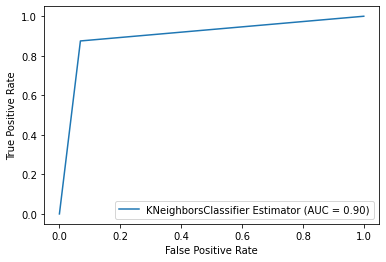

In [33]:
# Import ROC curve and AUC metric from Scikit-Learn
from sklearn import metrics
# Plot ROC curve and calculate AUC metric
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="KNeighborsClassifier Estimator")
display.plot()
plt.show()

#### PassiveAggressiveClassifier

In [30]:
from sklearn.linear_model import PassiveAggressiveClassifier

np.random.seed(42)

best_pa_model = PassiveAggressiveClassifier()
best_pa_model.fit(X_train, y_train)
best_pa_model.score(X_test, y_test)

0.8852459016393442

In [31]:
pa_y_preds = best_pa_model.predict(X_test)

In [32]:
pa_y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

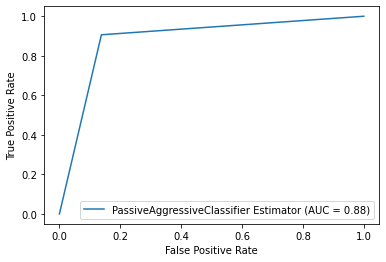

In [34]:
# Import ROC curve and AUC metric from Scikit-Learn
from sklearn import metrics
# Plot ROC curve and calculate AUC metric
fpr, tpr, thresholds = metrics.roc_curve(y_test, pa_y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="PassiveAggressiveClassifier Estimator")
display.plot()
plt.show()

#### RidgeClassifier

In [35]:
from sklearn.linear_model import RidgeClassifier

np.random.seed(42)

best_rc_model = RidgeClassifier()
best_rc_model.fit(X_train, y_train)
best_rc_model.score(X_test, y_test)

0.8852459016393442

In [36]:
rc_y_preds = best_rc_model.predict(X_test)

In [37]:
rc_y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

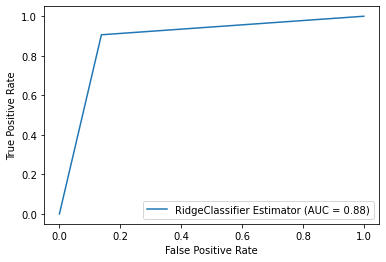

In [39]:
# Import ROC curve and AUC metric from Scikit-Learn
from sklearn import metrics
# Plot ROC curve and calculate AUC metric
fpr, tpr, thresholds = metrics.roc_curve(y_test, rc_y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="RidgeClassifier Estimator")
display.plot()
plt.show()

#### Confusion matrix

We can also summarize the performance of our model using a confusion matrix. A confusion matrix is a matrix that tells us how many of our predictions are good and how many are bad using a simple system.

The system is as follows:

* The upper left cell shows the number of true positive values, i.e. the values that were predicted as a 1 and were actually 1.

* The upper right cell shows the number of false positive values, i.e. the values that were predicted as a 1 and were actually 0.

* The lower left cell shows the number of false negative values, i.e. the values that were predicted as a 0 and were actualy 1.

* The lower right cell shows the number of true negative values, i.e. the values that were precited as a 0 and were actually 0.

#### KNeighborsClassifier

array([[27,  2],
       [ 4, 28]], dtype=int64)

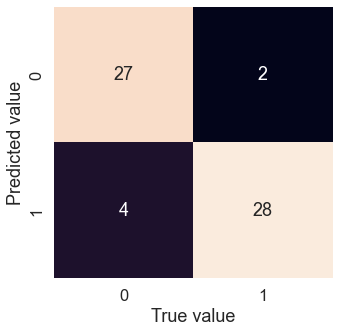

In [40]:
# Import Confusion Matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Let's visualize it, to see it clearer
sns.set(font_scale=1.5) # Increase font size

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(confusion_matrix(y_test, knn_y_preds),
                     annot=True, # anotate the boxes
                     cbar=False) # show the color bar legend or not

plt.xlabel("True value")
plt.ylabel("Predicted value")
    
confusion_matrix(y_test, knn_y_preds)

#### Using KNeighborsClassifier we have got:

* 27 true positive values and 2 false positive values.

* 28 true negative values and 4 false negative values.

#### PassiveAggressiveClassifier

array([[25,  4],
       [ 3, 29]], dtype=int64)

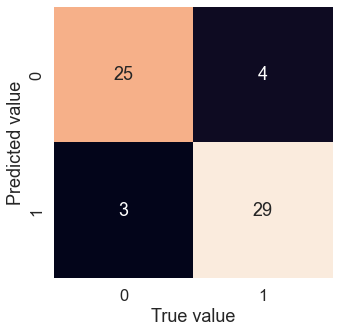

In [34]:
# Import Confusion Matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Let's visualize it, to see it clearer
sns.set(font_scale=1.5) # Increase font size

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(confusion_matrix(y_test, pa_y_preds),
                     annot=True, # anotate the boxes
                     cbar=False) # show the color bar legend or not

plt.xlabel("True value")
plt.ylabel("Predicted value")
    
confusion_matrix(y_test, pa_y_preds)

#### Using PassiveAggressiveClassifier we have got:

* 25 true positive values and 4 false positive values.

* 29 true negative values and 3 false negative values.

#### RidgeClassifier

array([[25,  4],
       [ 3, 29]], dtype=int64)

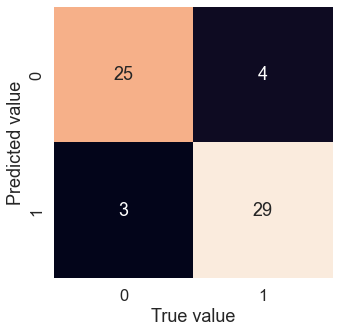

In [38]:
# Import Confusion Matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Let's visualize it, to see it clearer
sns.set(font_scale=1.5) # Increase font size

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(confusion_matrix(y_test, rc_y_preds),
                     annot=True, # anotate the boxes
                     cbar=False) # show the color bar legend or not

plt.xlabel("True value")
plt.ylabel("Predicted value")
    
confusion_matrix(y_test, rc_y_preds)

#### Using RidgeClassifier we have got:

* 25 true positive values and 4 false positive values.

* 29 true negative values and 3 false negative values.

#### Classification recall

Classification report agglutinates precision, recall and f1 scores in a single utility function.

#### KNeighborsClassifier

In [33]:
# Import classification report from Scikit-Learn
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, knn_y_preds))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



#### PassiveAggressiveClassifier

In [39]:
# Import classification report from Scikit-Learn
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, pa_y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### RidgeClassifier

In [40]:
# Import classification report from Scikit-Learn
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, rc_y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Cross-validation

Cross-validation is the technique used to avoid overfitting. It consists on separate and evaluate the training data set in different folds.

In [30]:
# Import cross-validation
from sklearn.model_selection import cross_val_score

#### KNeighborsClassifier

In [65]:
np.random.seed(42)

scalar = StandardScaler()
best_knn_model = KNeighborsClassifier()

pipeline = Pipeline([("transformer", scalar), ("estimator", best_knn_model)])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9016393442622951

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(42)

scalar = StandardScaler()
best_knn_model = KNeighborsClassifier()

pipeline = Pipeline([("transformer", scalar), ("estimator", best_knn_model)])
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
scores

array([0.7755102 , 0.83673469, 0.83333333, 0.75      , 0.875     ])

In [67]:
scores.mean()

0.8141156462585034

#### Accuracy

In [62]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
scores

array([0.7755102 , 0.83673469, 0.83333333, 0.75      , 0.875     ])

In [63]:
scores.mean()

0.8141156462585034

#### Precision

In [54]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="precision")
scores

array([0.80769231, 0.88      , 0.80645161, 0.71875   , 0.91666667])

In [55]:
scores.mean()

0.8259121174524401

#### Recall

In [52]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="recall")
scores

array([0.77777778, 0.81481481, 0.92592593, 0.88461538, 0.84615385])

In [53]:
scores.mean()

0.8498575498575498

#### F1-score

In [50]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="f1")
scores

array([0.79245283, 0.84615385, 0.86206897, 0.79310345, 0.88      ])

In [51]:
scores.mean()

0.8347558180271257

#### PassiveAggressiveClassifier

In [42]:
np.random.seed(42)

scalar_pa = MinMaxScaler()
best_pa_model = PassiveAggressiveClassifier()

pipeline_pa = Pipeline([("transformer", scalar_pa), ("estimator", best_pa_model)])
pipeline_pa.fit(X_train, y_train)
pipeline_pa.score(X_test, y_test)

0.8852459016393442

In [44]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

np.random.seed(42)

scalar_pa = MinMaxScaler()
best_pa_model = PassiveAggressiveClassifier()

pipeline = Pipeline([("transformer", scalar_pa), ("estimator", best_pa_model)])
pa_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
pa_scores

array([0.55102041, 0.83673469, 0.75      , 0.8125    , 0.83333333])

In [45]:
pa_scores.mean()

0.7567176870748299

#### Accuracy

In [104]:
np.random.seed(42)
pa_acc_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
pa_acc_score

array([0.55102041, 0.83673469, 0.75      , 0.8125    , 0.83333333])

In [105]:
pa_acc_score.mean()

0.7567176870748299

#### Precision

In [108]:
np.random.seed(42)
pa_prec_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="precision")
pa_prec_score

array([0.77777778, 0.78787879, 0.85714286, 0.79310345, 0.78125   ])

In [109]:
pa_prec_score.mean()

0.799430574215057

#### Recall

In [110]:
np.random.seed(42)
pa_rec_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="recall")
pa_rec_score

array([0.25925926, 0.96296296, 0.66666667, 0.88461538, 0.96153846])

In [111]:
pa_rec_score.mean()

0.747008547008547

#### F1-score

In [112]:
np.random.seed(42)
pa_f1_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="f1")
pa_f1_score

array([0.38888889, 0.86666667, 0.75      , 0.83636364, 0.86206897])

In [113]:
pa_f1_score.mean()

0.7407976314872867

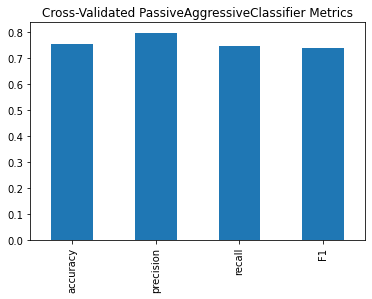

In [114]:
# Visualize cross-validation metrics
cv_pa_metrics = pd.DataFrame({"accuracy": pa_acc_score.mean(),
                           "precision": pa_prec_score.mean(),
                           "recall": pa_rec_score.mean(),
                           "F1": pa_f1_score.mean()},
                          index=[0])

cv_pa_metrics.T.plot.bar(title="Cross-Validated PassiveAggressiveClassifier Metrics",
                      legend=False);

#### RidgeClassifier

In [117]:
np.random.seed(42)

scalar_rc = MinMaxScaler()
best_rc_model = RidgeClassifier()

pipeline_rc = Pipeline([("transformer", scalar_rc), ("estimator", best_rc_model)])
pipeline_rc.fit(X_train, y_train)
pipeline_rc.score(X_test, y_test)

0.8852459016393442

In [115]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

np.random.seed(42)

scalar_rc = MinMaxScaler()
best_rc_model = PassiveAggressiveClassifier()

pipeline = Pipeline([("transformer", scalar_rc), ("estimator", best_rc_model)])
rc_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
rc_scores

array([0.55102041, 0.83673469, 0.75      , 0.8125    , 0.83333333])

In [116]:
rc_scores.mean()

0.7567176870748299

#### Accuracy

In [120]:
rc_acc_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
rc_acc_score

array([0.55102041, 0.83673469, 0.75      , 0.8125    , 0.83333333])

In [121]:
rc_acc_score.mean()

0.7567176870748299

#### Precision

In [122]:
np.random.seed(42)
rc_prec_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="precision")
rc_prec_score

array([0.77777778, 0.78787879, 0.85714286, 0.79310345, 0.78125   ])

In [123]:
rc_prec_score.mean()

0.799430574215057

#### Recall

In [124]:
np.random.seed(42)
rc_rec_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="recall")
rc_rec_score

array([0.25925926, 0.96296296, 0.66666667, 0.88461538, 0.96153846])

In [125]:
rc_rec_score.mean()

0.747008547008547

#### F1-score

In [126]:
np.random.seed(42)
rc_f1_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="f1")
rc_f1_score

array([0.38888889, 0.86666667, 0.75      , 0.83636364, 0.86206897])

In [127]:
rc_f1_score.mean()

0.7407976314872867

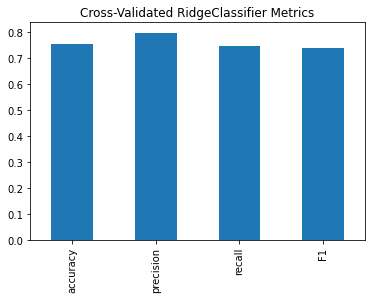

In [128]:
# Visualize cross-validation metrics
cv_rc_metrics = pd.DataFrame({"accuracy": rc_acc_score.mean(),
                           "precision": rc_prec_score.mean(),
                           "recall": rc_rec_score.mean(),
                           "F1": rc_f1_score.mean()},
                          index=[0])

cv_rc_metrics.T.plot.bar(title="Cross-Validated RidgeClassifier Metrics",
                      legend=False);

## 7. Final Considerations

> As can be seen we have not achieved the target accuracy of at least 95%. Although we have carried out the testing of different models and, subsequently, we have tried to improve the best ones with several performance improvement techniques (some of them quite advanced). However, since this is a project to show capabilities in the use of machine learning and not a corporate project we do not see the need to follow the line of model improvement. In future more ambitious works we will consider to go deeper in the model performance improvement section.